In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from LLS import LLs
import re



In [148]:
df = pd.read_csv('Dollar_Rial_Price_Dataset.csv')
df = df.drop(df.columns[0], axis=1)
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df['High'] = df['High'].apply(lambda x: re.sub(',', '', x))
df["High"] = pd.to_numeric(df["High"] , errors='coerce')
df['Low'] = df['Low'].apply(lambda x: re.sub(',', '', x))
df["Low"] = pd.to_numeric(df["Low"] , errors='coerce')
df['Open'] = df['Open'].apply(lambda x: re.sub(',', '', x))
df["Open"] = pd.to_numeric(df["Open"] , errors='coerce')
df['Close'] = df['Close'].apply(lambda x: re.sub(',', '', x))
df["Close"] = pd.to_numeric(df["Close"] , errors='coerce')

In [149]:
df

,Date,Persian_Date,Open,Low,High,Close
0,11/27/2011,1390/09/06,13700,13700,13700,13700
1,11/28/2011,1390/09/07,13440,13440,13440,13440
2,11/29/2011,1390/09/08,13350,13350,13350,13350
3,11/30/2011,1390/09/09,13400,13400,13400,13400
4,12/1/2011,1390/09/10,13500,13500,13500,13500
...,...,...,...,...,...,...
3305,7/1/2023,1402/04/10,492660,492600,498400,498220
3306,7/2/2023,1402/04/11,500810,498600,500900,499340
3307,7/3/2023,1402/04/12,503210,501400,503400,502000
3308,7/4/2023,1402/04/13,502140,498300,502200,500750


In [150]:
df_ahmadinejad = df.loc[df["Persian_Date"].between("1390/01/01", "1392/05/12")]
df_rohani = df.loc[df["Persian_Date"].between("1390/05/13", "1400/05/12")]
df_raeesi = df.loc[df["Persian_Date"].between("1400/05/13", "1402/05/12")]

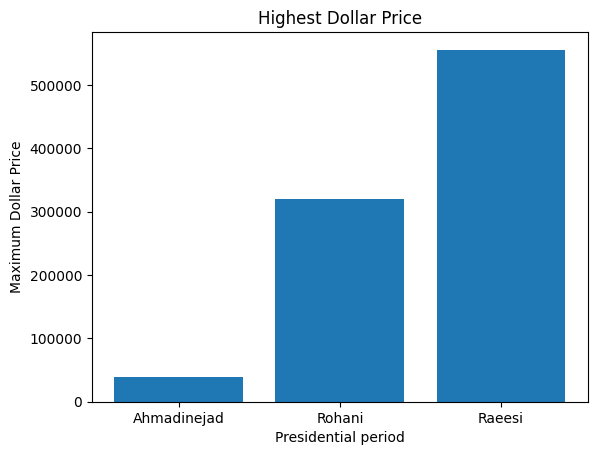

In [151]:
x = ["Ahmadinejad", "Rohani" , "Raeesi"]
highest_doller_price= []
highest_doller_price.append(df_ahmadinejad['High'].max())
highest_doller_price.append(df_rohani['High'].max())
highest_doller_price.append(df_raeesi['High'].max())

plt.bar(x , highest_doller_price)
plt.xlabel("Presidential period")
plt.ylabel("Maximum Dollar Price")
plt.title("Highest Dollar Price")
plt.show()



['13,350', '100,370', '251,250']


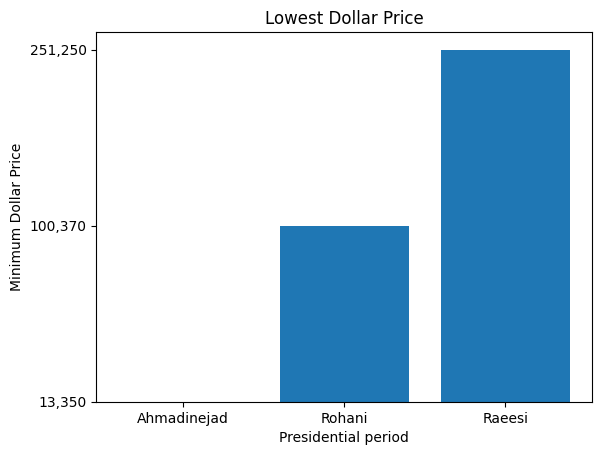

In [139]:
lowest_doller_price= []
lowest_doller_price.append(df_ahmadinejad['Low'].min())
lowest_doller_price.append(df_rohani['Low'].min())
lowest_doller_price.append(df_raeesi['Low'].min())
print(lowest_doller_price)
plt.bar(x , lowest_doller_price)
plt.xlabel("Presidential period")
plt.ylabel("Minimum Dollar Price")
plt.title("Lowest Dollar Price")
plt.show()

In [136]:
df_rohani['Date']

0       11/27/2011
1       11/28/2011
2       11/29/2011
3       11/30/2011
4        12/1/2011
           ...    
2853     7/28/2021
2854     7/31/2021
2855      8/1/2021
2856      8/2/2021
2857      8/3/2021
Name: Date, Length: 2858, dtype: object

In [50]:
df_ahmadinejad["Date"].astype('str')
df_ahmadinejad["Date"] = df_ahmadinejad["Date"].str.replace('/', '')
df_ahmadinejad.loc['Date'] = pd.to_datetime(df_ahmadinejad.Date, format='%m %d %Y',errors='coerce')
df_ahmadinejad['Date']

C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\2550973361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ahmadinejad["Date"] = df_ahmadinejad["Date"].str.replace('/', '')
C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\2550973361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ahmadinejad.loc['Date'] = pd.to_datetime(df_ahmadinejad.Date, format='%m %d %Y',errors='coerce')


0       11272011
1       11282011
2       11292011
3       11302011
4        1212011
          ...   
479      7292013
480      7312013
481       812013
482       832013
Date         NaN
Name: Date, Length: 484, dtype: object

In [51]:
df_ahmadinejad = df_ahmadinejad.drop(['Persian_Date'], axis = 1)


In [52]:
df_ahmadinejad = df_ahmadinejad[:483]
df_ahmadinejad.corr()

,Date,Open,Low,High,Close
Date,1.000000,-0.051796,-0.049055,-0.054735,-0.052578
Open,-0.051796,1.000000,0.999068,0.998682,0.998392
Low,-0.049055,0.999068,1.000000,0.997781,0.998599
High,-0.054735,0.998682,0.997781,1.000000,0.999507
Close,-0.052578,0.998392,0.998599,0.999507,1.000000


In [53]:
X_ahmadinejad =  (df_ahmadinejad[['Date']]).values
Y_ahmadinejad = (df_ahmadinejad[['Close']]).values
X_ahmadinejad = X_ahmadinejad.astype('float')
Y_ahmadinejad = Y_ahmadinejad.astype('float')
X_train_ahmadinejad , X_test_ahmadinejad , y_train_ahmadinejad , y_test_ahmadinejad  = train_test_split(X_ahmadinejad, Y_ahmadinejad, test_size = 0.25)

In [54]:
lls = LLs()
w_ahmadinejad = lls.fit(X_train, y_train)
w_ahmadinejad

array([[0.00322345]])

In [55]:
from sklearn.metrics import mean_absolute_error as mae

In [56]:
y_pred_ahmadinejad = w_ahmadinejad * X_test_ahmadinejad

In [57]:
Mean_Absolute_Error_AN = mae(y_test, y_pred)
Mean_Absolute_Error_AN

14892.776863041327

In [58]:
df_rohani["Date"]

0       11/27/2011
1       11/28/2011
2       11/29/2011
3       11/30/2011
4        12/1/2011
           ...    
2853     7/28/2021
2854     7/31/2021
2855      8/1/2021
2856      8/2/2021
2857      8/3/2021
Name: Date, Length: 2858, dtype: object

In [89]:
df_rohani["Date"] = df_rohani["Date"].astype('str')

df_rohani["Date"] = df_rohani["Date"].str.replace('/', '')
df_rohani["Date"]


C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\3018054981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rohani["Date"] = df_rohani["Date"].astype('str')
C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\3018054981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rohani["Date"] = df_rohani["Date"].str.replace('/', '')


0       11272011
1       11282011
2       11292011
3       11302011
4        1212011
          ...   
2853     7282021
2854     7312021
2855      812021
2856      822021
2857      832021
Name: Date, Length: 2858, dtype: object

In [90]:
# df_rohani['Date'] = pd.to_datetime(df_rohani.Date, format='%m %d %Y',errors='coerce')
df_rohani['Date'] = df_rohani.loc[:, 'Date'].tolist()

C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\2353414099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rohani['Date'] = df_rohani.loc[:, 'Date'].tolist()


In [91]:
df_rohani['Date']

0       11272011
1       11282011
2       11292011
3       11302011
4        1212011
          ...   
2853     7282021
2854     7312021
2855      812021
2856      822021
2857      832021
Name: Date, Length: 2858, dtype: object

In [92]:
df_rohani

,Date,Persian_Date,Open,Low,High,Close
0,11272011,1390/09/06,13700,13700,13700,13700
1,11282011,1390/09/07,13440,13440,13440,13440
2,11292011,1390/09/08,13350,13350,13350,13350
3,11302011,1390/09/09,13400,13400,13400,13400
4,1212011,1390/09/10,13500,13500,13500,13500
...,...,...,...,...,...,...
2853,7282021,1400/05/06,251800,251690,256240,255990
2854,7312021,1400/05/09,260270,256990,260640,257290
2855,812021,1400/05/10,257190,254290,257640,254890
2856,822021,1400/05/11,255690,254590,256640,255190


In [93]:
df_rohani = df_rohani.drop(['Persian_Date'], axis = 1)

In [94]:
X_rohani =  (df_rohani[['Date']]).values
Y_rohani = (df_rohani[['Close']]).values
X_rohani = X_rohani.astype('float')
Y_rohani = Y_rohani.astype('float')
X_train_rohani , X_test_rohani , y_train_rohani , y_test_rohani  = train_test_split(X_rohani, Y_rohani, test_size = 0.25)

In [97]:
lls = LLs()
w_rohani = lls.fit(X_train_rohani,y_train_rohani)
w_rohani

array([[0.00890009]])

In [99]:
y_pred_rohani = X_test_rohani * w_rohani

In [100]:
Mean_Absolute_Error_Ro = mae(y_test_rohani , y_pred_rohani)

In [101]:
Mean_Absolute_Error_Ro

61144.98172058964

In [102]:
## Raeesi 

In [107]:
df_raeesi["Date"] = df_raeesi["Date"].astype('str')

df_raeesi["Date"] = df_raeesi["Date"].str.replace('/', '')
df_raeesi["Date"]
# df_rohani['Date'] = pd.to_datetime(df_rohani.Date, format='%m %d %Y',errors='coerce')
df_raeesi['Date'] = df_raeesi.loc[:, 'Date'].tolist()

C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\614825010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raeesi["Date"] = df_raeesi["Date"].astype('str')
C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\614825010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raeesi["Date"] = df_raeesi["Date"].str.replace('/', '')
C:\Users\hdsha\AppData\Local\Temp\ipykernel_17700\614825010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [108]:
df_raeesi['Date']

2858    842021
2859    852021
2860    872021
2861    882021
2862    892021
         ...  
3305    712023
3306    722023
3307    732023
3308    742023
3309    752023
Name: Date, Length: 452, dtype: object

In [115]:
# df_raeesi = df_rohani.drop(['Persian_Date'], axis = 1)
X_raeesi =  (df_raeesi[['Date']]).values
Y_raeesi = (df_rohani[['Close']]).values
X_raeesi = X_rohani.astype('float')
Y_raeesi = Y_rohani.astype('float')
X_train_raeesi , X_test_raeesi , y_train_raeesi , y_test_raeesi  = train_test_split(X_raeesi, Y_raeesi, test_size = 0.25)

In [116]:
lls = LLs()
w_raeesi = lls.fit(X_train_rohani,y_train_rohani)
w_raeesi

array([[0.00890009]])

In [117]:
y_pred_raeesi = X_test_raeesi * w_raeesi

In [118]:
Mean_Absolute_Error_Ra = mae(y_test_raeesi, y_pred_raeesi)
Mean_Absolute_Error_Ra

64991.215207617286